# dsci100_team26_project

From the Jupyter Server Menu:
git -> clone_repository -> enter github info -> done

I. Introduction <br>
&nbsp; a. Brief Overview of the Project  <br>
&nbsp; b. Brief Literature Review  <br>
&nbsp; c. Describing the Data Set and how we will use it  <span style="color: green">[CODE - put in appendix]</span><br> 
II. Methods <br>
&nbsp; a. Methodology summary  <br>
&nbsp; b. Preparation (Loading, Wrangling, and Cleaning the Data)  <br>
&nbsp;
&nbsp;
&nbsp; Lebron James Example <br>
&nbsp; c. Exploratory Data Analysis  <br>
&nbsp; d. (Hypothesized) Initial Model Parameter Selection  <br>
&nbsp; e. Optimizing training-model via Forward Model Selection  <br>
&nbsp; d. Optimizing training-model using all Param subsets for Selection <span style="color: red">[CODE - put in appendix]</span>  <br>
III. Results <br>
&nbsp; a. Results Overview  <br>
&nbsp; b. Best Model (probably from Param Selection)  <br>
&nbsp; c. Testing best model on the testing data <br>
&nbsp; d. Visualization of results <br>
IV. Sources <br>
V. Appendices


Create R libraries



1. Finish Methods 
    Build initial classification
        Use forward selection 
        Use all sub-set selection
    Change to trying to predict Guards vs. Forwards
    Take initial date, change positions, re-split, re-visualize training data, then build knn model with all subset selection
    

In [12]:
library(tidyverse)
library(tidymodels)

# Abstract

We build four classification models. First, we  improving on an initial hypothesis 

# Introduction <a name="introduction"></a>

This project is inspired by the ambiguity of basketball positions, based on how the game is played in National-Basketball-Association (NBA) regulation basketball, and the aptness of this question as a classification exercise.

In NBA Basketball, there are no players consistently on offense or defense, unlike Football/Soccer and American Football and Baseball. Instead, when possession of the ball changes teams, the same players who were just on defense immediately begin playing offense, and vice-versa. This makes the role of each player harder to understand for someone watching basketball for the first time. In fact, many first-time basketball viewers may not realize that there are positions at all, and junior/recreational basketball teams frequently play without positions. The goal of our work here is to suggest whether these positions exist largely as formalities, or if <u>players' positions can be classified by their past gameplay statistics</u>.

<b>Background</b>

Below is a table describing the 5 different basketball positions, and an accompanying figure showing where each position is usually found.

<br>

| Position      | Description |
| ----------- | ----------- |
| Point Guard (PG)      | Text       |
| Shooting Guard (SG)   | Text        |
| Small Forward (SF)   | Text        |
| Power Forward (PF)   | Text        |
| Center (C)   | Text        |

<br>


<img align="center"
     src="https://upload.wikimedia.org/wikipedia/commons/a/ac/Basketball_Positions.png" width="400" height="400"
     alt="imageinfo" 
     style=""/>





<br><br><br>
<b> Literature Review </b>


<br><br><br>
<b> Data </b>

The data we are working with comes from basketball-reference.com ... 


# Methods

... "The objective of our investigation is to build a classification model that uses a player's gameplay statistics plus height and weight to predict that player's position, and to use the accuracy of this model to answer our question about the nature of positions in basketball.




Before starting, we ensure the appropriate libraries are installed, and a seed is set in order to ensure the reproducibility of this notebook. 

We  begin our investigation by loading and wrangling the season statistics. From the raw data, we select 7 non-derived , gameplay statistics (no ratios, percentages, etc.) Throughout this notebook these statistics will be referred to by their abbreviations given below.

| Abbreviation      | Full | Description (# = number of times a player ...) | 
| ----------- | ----------- | ----------- 
| BLK         | Blocks      | # blocks the opposing team from scoring
| AST         | Assists     | # passes to another player on their team who scores
| STL         | Steals      | # steals the ball from the opposing team
| PF       | Personal Fouls | # fouls a member of the opposing team
| TRB      | Total Rebounds | # gains possession of the ball after an attempted basket (from their team or opposing)
| MP       | Minutes Played | # plays for a whole minute
| 3PA     | 3 Point Attempts| # shoots from outside the 3 - point line (far from the basket)

<br>

Next, we load and wrangle additional data containing every NBA player's height and weight, and merge this with the season statistics, resulting in a new dataset that has the cumulative statistics for *each position* that each player has played in the NBA from 2000 to 2015, and their height and weight (which doesn't vary between position.). We divide each player's cumulative gameplay statistics by the total minutes they've played throughout either their career or the years 2000 - 2015 (whichever is less) to account for the varying game time of each player in the time frame under consideration.

We then conduct an exploratory analysis and build an initial classification model. Finding this initial model's low accuracy on training data unsatisfying, we try to optimize it using the *forward selection* technique to select the best combination of parameters. This does little to improve its accuracy, so we then develop a second classification model used to predict between just two types of positions: Guards and Forwards. This second model performs significantly better on its training data, so we continue with it to the testing stage. We discuss our different models and the implication of their different accuracy to our research question in the [Discussion](#discussion) section.

## Setup

Below we load the typical DSCI100 packages, the viridis library to ensure our visualizations are accessible, and three additional mini packages that we purpose-built for this project: 
- `bball_scrape` : collects data from *basketball-reference.com* (we have followed the protocol set forth in <a href="https://datasciencebook.ca/reading.html#obtaining-data-from-the-web">Chapter 2 of *Data Science: A First Introduction*</a> to ensure we are webscraping ethically.) 
- `forward_selection` : optimizies which predictor variables are used in our classification model
- `best_subset_selection` : further optimizes which predictor variables to use

We include the code for these packages in the appendices. Because the techniques used in these packages were not discussed in class we do not devote many words to describing them in this notebook, but we do include a README.md describing each of them in their respective github repositories, which are listed alongside their code in the [appendices](#appendices).

In [3]:
library(tidyverse)
library(tidymodels)
library(viridis)

# library(devtools)
# install_github("james-magee/bball_scrape")
# install_github("james-magee/forward_selection")
# install_github("james-magee/best_subset_selection")

# library(bball_scrape)
# library(forward_selection)
# library(best_subset_selection)

set.seed(2023)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.3     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.3     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

## Loading, Wrangling, and Splitting the Data

To begin our analysis, we need data! We break this process into 7 steps:
1. Load the raw data from our [webscraping library](#appendix1)
2. Filter rows, select columns, and rename columns: 
    * Filter the raw data to remove:
        * rows where `MP == 0` (minutes played). We will later divide each predictor column by minutes played (`MP`) so it can't be zero.
        * rows where `Year` is outside the 2000-2015 range.
        * rows where `Pos` is not one of the 5 common positions in Basketball today (see [Methods](#methods))
    * Select the columns we are interested in (see [Methods](#methods))
    * Rename non-predictor columns to be lowercase, and convert the `Pos` column from type character-string to factor. 
3. Consolidate rows containing statistics for the same player and position, and divide by `MP`.
4. Load the player height/weight data
5. Wrangle the player height/weight data
6. Merge the player height and weight data with the season statistics
7. Partition our data into testing and training groups

In [4]:
# 1 : loading the season statistics

# raw_season_data <- get_season_data(2000:2020)
# head(raw_season_data)

# PREVIOUS:
#
urlfile_1 <- "https://raw.githubusercontent.com/cass12345/ddssccii/main/Seasons_Stats.csv"
raw_season_stats <- read_csv(url(urlfile_1), show_col_types = FALSE)

raw_season_stats |> 
    select(2:20) |>   # Select the first 20 columns, after the id
    drop_na() |>      # Drop rows with NA observatinos
    head()            # Show just the first 5 rows

New names:
• `` -> `...1`


Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1980,Tiny Archibald*,PG,31,BOS,80,80,2864,15.3,0.574,0.023,0.548,2.3,5.3,3.8,30.2,1.7,0.2,19.7
1980,Larry Bird*,PF,23,BOS,82,82,2955,20.5,0.538,0.098,0.246,8.3,23.6,16.0,18.5,2.3,1.0,14.0
1980,M.L. Carr,SF,29,BOS,82,7,1994,14.6,0.526,0.054,0.316,6.0,12.3,9.2,10.7,2.8,1.0,14.1
1980,Don Chaney,SG,33,BOS,60,0,523,7.8,0.402,0.032,0.222,6.7,8.8,7.8,9.3,2.8,1.2,13.7
1980,Dave Cowens*,C,31,BOS,66,55,2159,14.8,0.477,0.013,0.131,6.6,20.7,13.8,13.4,1.5,1.6,9.9
1980,Eric Fernsten,PF,26,BOS,56,0,431,14.4,0.497,0.000,0.340,10.5,14.3,12.4,8.7,1.8,1.6,10.2


In [5]:
# 2 : filtering, selecting, and renaming the season stats

filtered_stats <- raw_season_stats |>
    filter(MP != 0) |>
    filter(Pos %in% c("PF","PG","SF","SG","C")) |>
    filter(Year >= 2000 & Year <= 2015)

selected_stats <- filtered_stats |>
    select(Player, Pos, BLK, AST, TRB, STL, MP, "3PA", PF)

renamed_stats <- selected_stats |>
    rename(name = Player) |>
    rename(three_PA = "3PA") |>
    mutate(pos = as_factor(Pos), 
           .keep = "unused", 
           .after = 1)

renamed_stats |> head()

name,pos,BLK,AST,TRB,STL,MP,three_PA,PF
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tariq Abdul-Wahad,SG,28,98,291,59,1578,23,147
Tariq Abdul-Wahad,SG,16,72,239,53,1205,21,116
Tariq Abdul-Wahad,SG,12,26,52,6,373,2,31
Shareef Abdur-Rahim,SF,87,271,825,89,3223,96,244
Cory Alexander,PG,2,58,42,24,329,35,39
Ray Allen,SG,19,308,359,110,3070,407,187


In [191]:
# 3 : combining rows and dividing stats by minutes played to account for different play time 
#       - NOTE: we group by name AND position in order to accuractely consolidate gameplay statistics 
#               for players who have played mulitple positions.

cumulative_stats <- renamed_stats |>
    group_by(name, pos) |>
    summarize(across(.cols  = c(BLK, AST, TRB, STL, MP, three_PA, PF), 
                     .fns   = list(sum=sum),
                     .names = "{.col}"),
              .groups = "keep")

per_m_stats <- cumulative_stats |>
    mutate(across(.cols  = c(BLK, AST, TRB, STL, three_PA, PF),
                  .fns   = list(function(.){return(./MP)}),
                  .names = "{.col}_per_MP"),
           .keep = "unused")

head(per_m_stats)

name,pos,BLK_per_MP,AST_per_MP,TRB_per_MP,STL_per_MP,three_PA_per_MP,PF_per_MP
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A.C. Green,PF,0.007784431,0.03562874,0.23922156,0.02485030,0.002994012,0.07365269
A.J. Bramlett,C,0.000000000,0.00000000,0.36065574,0.01639344,0.000000000,0.21311475
A.J. Guyton,PG,0.009630819,0.11797753,0.06420546,0.01605136,0.154895666,0.04654896
A.J. Price,SG,0.000000000,0.13131313,0.10101010,0.01010101,0.222222222,0.05050505
A.J. Price,PG,0.002166586,0.14443909,0.09605200,0.03153587,0.174530573,0.05946076
Aaron Brooks,PG,0.006230943,0.14450484,0.07888108,0.02744266,0.165186265,0.08743206



<br>



In [7]:
# 4 : loading the height/weight data

# NEW:
# raw_player_data <- get_all_players()


# PREVIOUS:
#
urlfile_2 <- "https://raw.githubusercontent.com/cass12345/ddssccii/main/player_data.csv"
raw_player_data <- read_csv(url(urlfile_2), show_col_types = FALSE)

raw_player_data |> head()

name,year_start,year_end,position,height,weight,birth_date,college
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
Alaa Abdelnaby,1991,1995,F-C,6-10,240,"June 24, 1968",Duke University
Zaid Abdul-Aziz,1969,1978,C-F,6-9,235,"April 7, 1946",Iowa State University
Kareem Abdul-Jabbar,1970,1989,C,7-2,225,"April 16, 1947","University of California, Los Angeles"
Mahmoud Abdul-Rauf,1991,2001,G,6-1,162,"March 9, 1969",Louisiana State University
Tariq Abdul-Wahad,1998,2003,F,6-6,223,"November 3, 1974",San Jose State University
Shareef Abdur-Rahim,1997,2008,F,6-9,225,"December 11, 1976",University of California


In [8]:
# 5 : wrangling the height/weight data

player_ht_wt <- raw_player_data |>
    select(name, height, weight) |>
    separate(col  = height,
             into = c("feet","inches"),
             sep  = "-",
             convert = TRUE) |>
    mutate(height = feet * 12  + inches) |>
    select(name, weight, height)

player_ht_wt |> head()

name,weight,height
<chr>,<dbl>,<dbl>
Alaa Abdelnaby,240,82
Zaid Abdul-Aziz,235,81
Kareem Abdul-Jabbar,225,86
Mahmoud Abdul-Rauf,162,73
Tariq Abdul-Wahad,223,78
Shareef Abdur-Rahim,225,81


In [9]:
# 6 : merging the season stats and height/weight data

merged_data <- merge(x = per_m_stats, y = player_ht_wt, by.x = "name", by.y = "name") |>
    drop_na()
head(merged_data)

,name,pos,BLK_per_MP,AST_per_MP,TRB_per_MP,STL_per_MP,three_PA_per_MP,PF_per_MP,weight,height
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A.C. Green,PF,0.007784431,0.03562874,0.23922156,0.02485030,0.002994012,0.07365269,220,81
2,A.J. Bramlett,C,0.000000000,0.00000000,0.36065574,0.01639344,0.000000000,0.21311475,227,82
3,A.J. Guyton,PG,0.009630819,0.11797753,0.06420546,0.01605136,0.154895666,0.04654896,180,73
4,A.J. Price,SG,0.000000000,0.13131313,0.10101010,0.01010101,0.222222222,0.05050505,181,74
5,A.J. Price,PG,0.002166586,0.14443909,0.09605200,0.03153587,0.174530573,0.05946076,181,74
6,Aaron Brooks,PG,0.006230943,0.14450484,0.07888108,0.02744266,0.165186265,0.08743206,161,72


In [10]:
# 6 : splitting data into testing/training sets

data_split <- initial_split(merged_data, prop = 0.75, strata = pos)
train_data <- training(data_split)
test_data <- testing(data_split)

train_data |> head()

,name,pos,BLK_per_MP,AST_per_MP,TRB_per_MP,STL_per_MP,three_PA_per_MP,PF_per_MP,weight,height
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,Aaron Gray,C,0.02346690,0.05556785,0.3114899,0.02501660,8.855435e-04,0.17622316,270,84
18,Adam Keefe,C,0.02152318,0.05629139,0.2251656,0.02814570,1.655629e-03,0.14900662,230,81
21,Adonal Foyle,C,0.09331758,0.02640904,0.2623186,0.01991225,8.437395e-05,0.11778603,250,82
29,Al Horford,C,0.03446831,0.07934893,0.2721561,0.02477410,3.889654e-03,0.07396326,245,82
38,Alan Henderson,C,0.02172840,0.02518519,0.2641975,0.02074074,9.876543e-04,0.11160494,235,81
42,Aleksandar Radojevic,C,0.01973684,0.04605263,0.2368421,0.01315789,0.000000e+00,0.24342105,250,87


<br><br><br>

## Exploratory Analysis

We will use several boxplots to visualize the difference in distributions between positions, so we define a boxplot function below to simplify our code later on. 

In [11]:
make_boxplot <- function(train_df) {
    boxplot <- train_df |>
        mutate(across(where(is.numeric), scale)) |>
        pivot_longer(3:10, names_to = "key", values_to = "value") |>
        filter(value < 5 & value > -5) |>
        ggplot(aes(x = value, fill = pos)) +
        geom_boxplot(position = "dodge", alpha = 1, varwidth = TRUE) +
        facet_wrap(~key, ncol = 2) +
        scale_fill_viridis(option="magma", discrete=TRUE) +
        theme(text = element_text(size = 18),
              axis.title.y=element_blank(),
              axis.text.y=element_blank(),
              axis.ticks.y=element_blank())
    return(boxplot)
}

Below we plot the distributions of each of our predictor variables using boxplots, after standardizing.

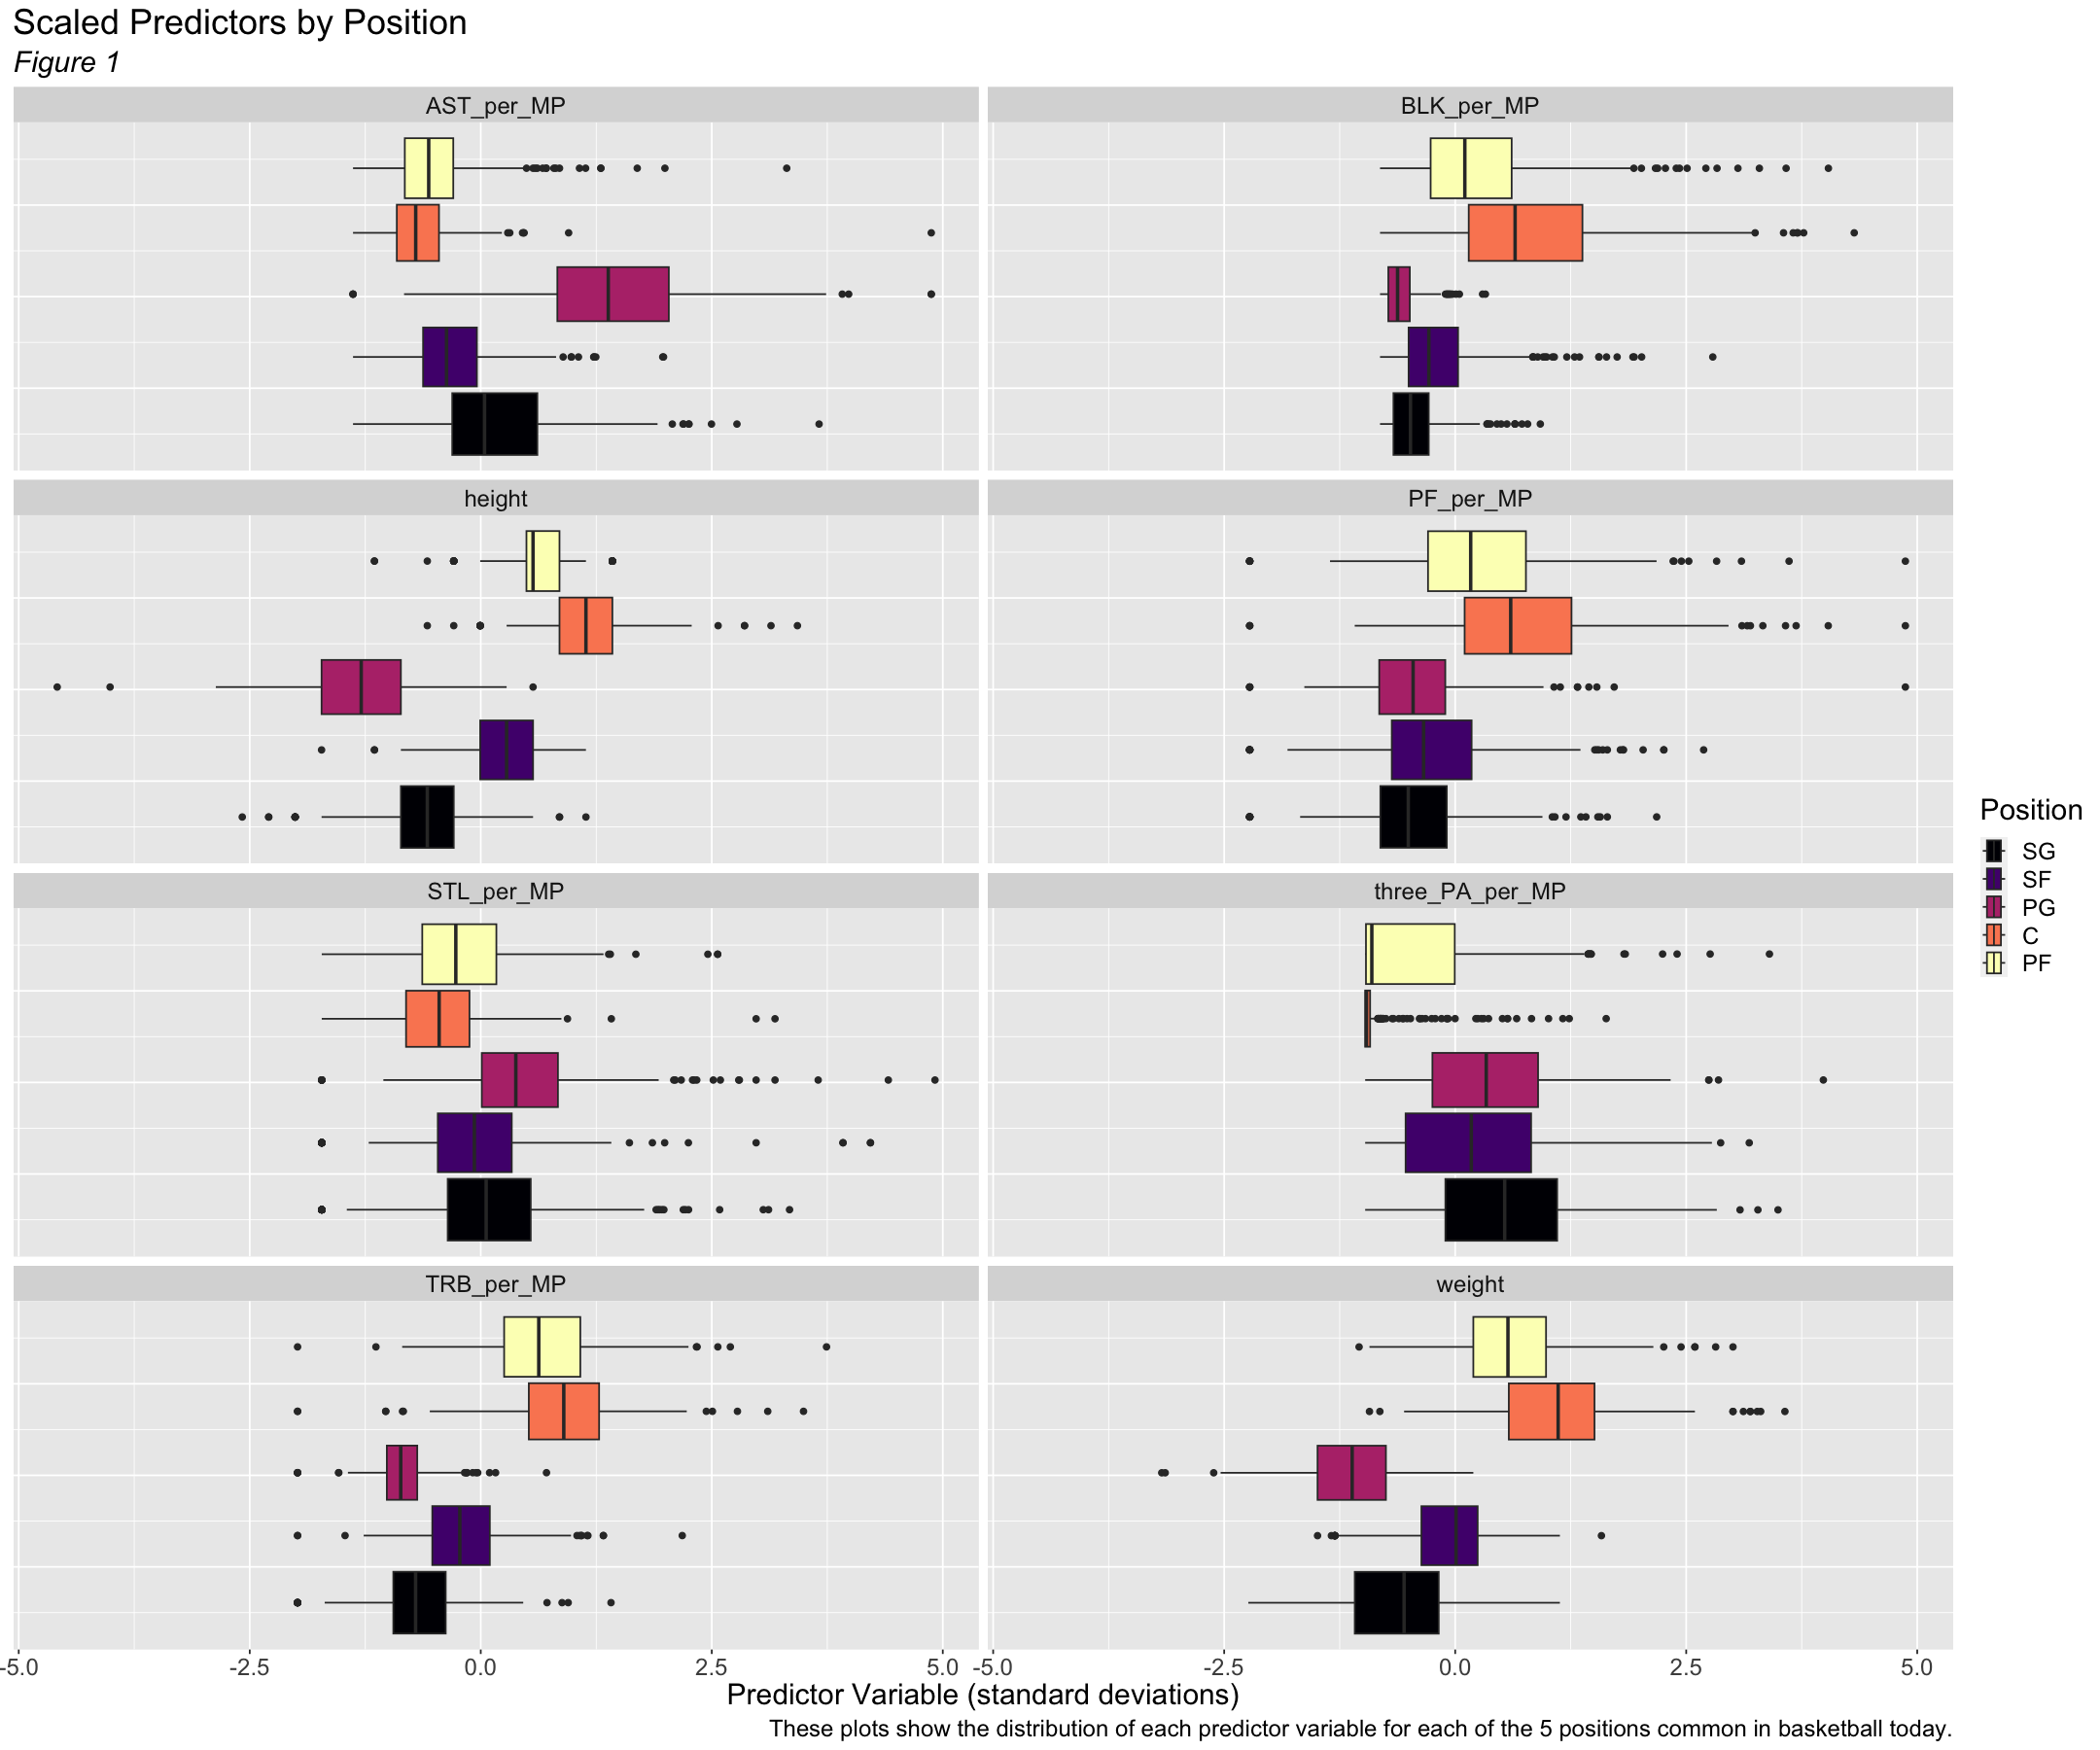

In [12]:
options(repr.plot.width = 18, repr.plot.height = 15, repr.plot.margin = 15)

train_data |>
    make_boxplot() +
    labs(x = "Predictor Variable (standard deviations)", 
         y = "Frequency (count)", 
         title="Scaled Predictors by Position", 
         fill = "Position",
         subtitle = "Figure 1",
         caption = "These plots show the distribution of each predictor variable for each of the 5 positions common in basketball today."
        ) +
    theme(plot.subtitle=element_text(size=18, face="italic", color="black"))

**A pattern revealed**

In most of the plots above, Centers and Power Forwards (henceforth "Forwards") have largely overlapping distributions, while Point Guards and Shooting Guards (henceforth "Guards") have largely overlapping distributions. However, the Small Forward distributions overlap with the Forwards for some variables, but with the Guards for others, and is frequently between the Forwards and Guards. For example, in the 3PA and TRB plots, the Small Forward IQR is much closer to the IQRs of the Guard positions. But, in the height and BLK plots, the Small Forward IQR is roughly between the Forwards and Guards.

To explore this pattern further, we compare the distributions for the Guards, Forwards including Small Forward, and Forwards excluding Small Forward:

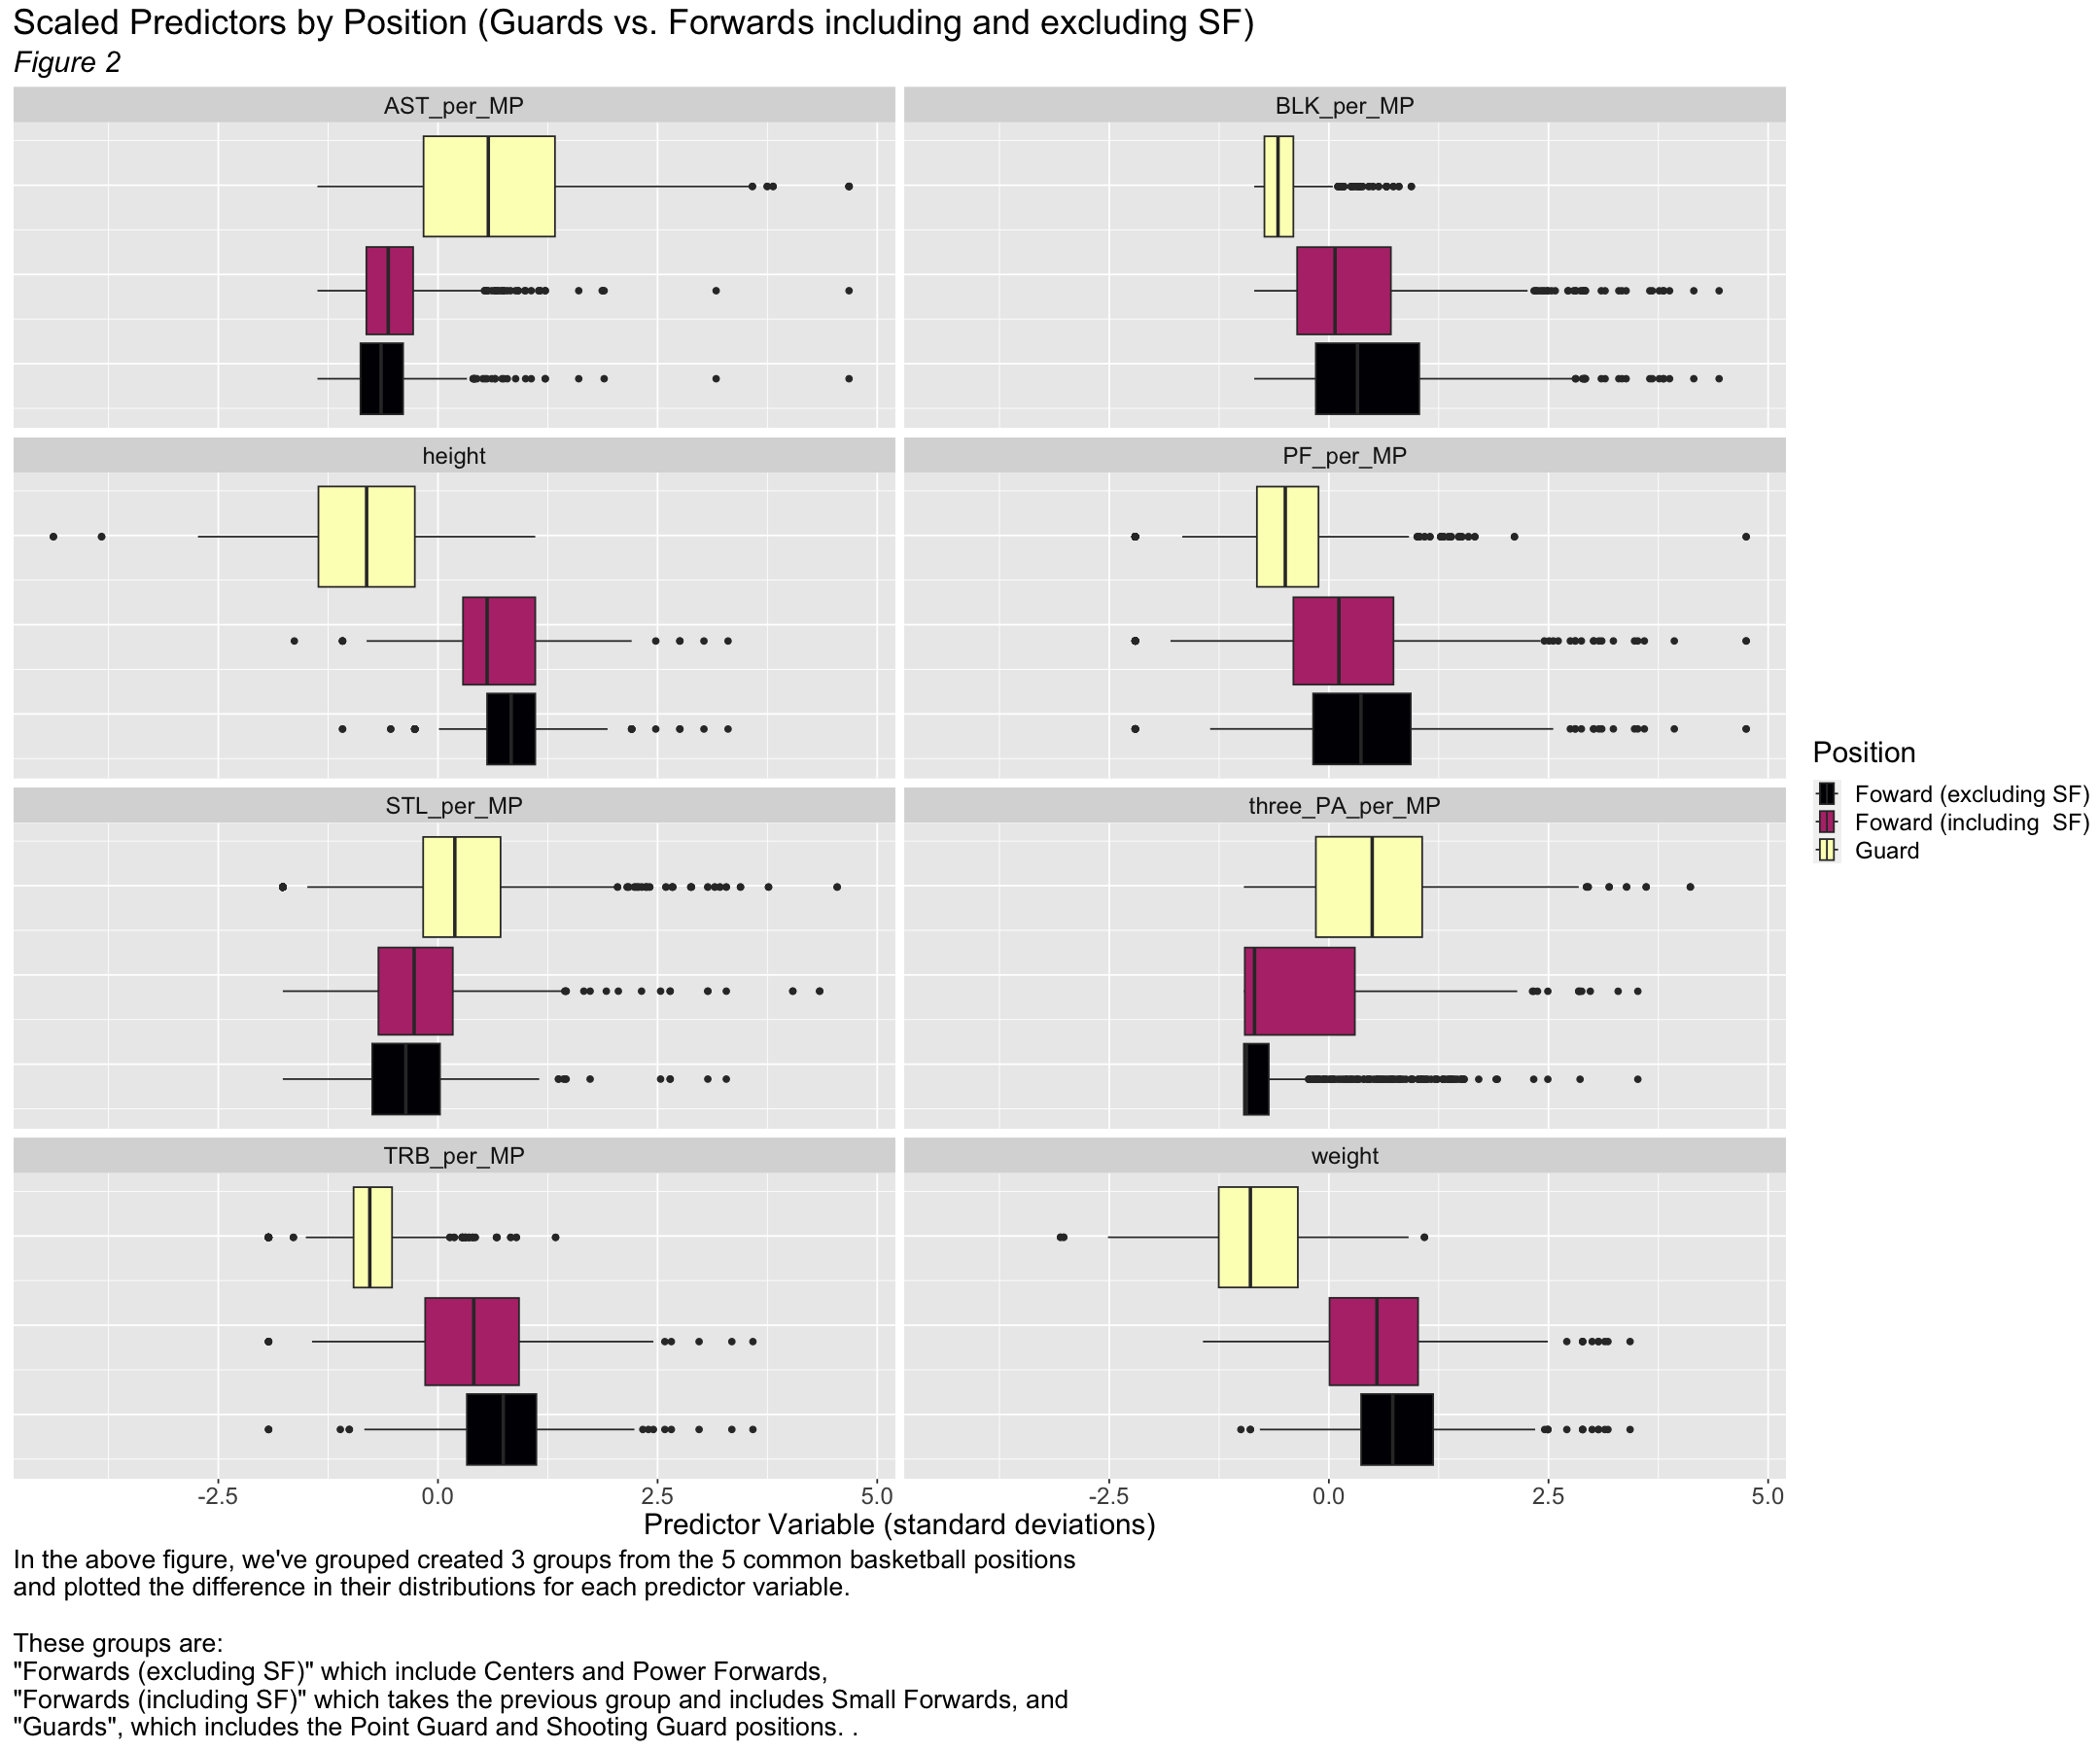

In [13]:
forward_with_sf <- train_data |>
    filter(pos != "SF") |>
    mutate(pos = ifelse(pos %in% c("C", "PF"), "Foward (excluding SF)", "Guard"))

forward_wo_sf <- train_data |>
    mutate(pos = ifelse(pos %in% c("C", "PF", "SF"), "Foward (including  SF)", "Guard"))

rbind(forward_with_sf, forward_wo_sf) |>
    make_boxplot() +
    labs(x = "Predictor Variable (standard deviations)", 
         y = "Frequency (count)", 
         title="Scaled Predictors by Position (Guards vs. Forwards including and excluding SF)", 
         fill = "Position",
         caption = "In the above figure, we've grouped created 3 groups from the 5 common basketball positions\nand plotted the difference in their distributions for each predictor variable. \n\nThese groups are: \n\"Forwards (excluding SF)\" which include Centers and Power Forwards, \n\"Forwards (including SF)\" which takes the previous group and includes Small Forwards, and \n\"Guards\", which includes the Point Guard and Shooting Guard positions. .", 
         subtitle = "Figure 2") +
    theme(plot.subtitle = element_text(size=18, face="italic", color="black"),
          plot.caption = element_text(size = 16, hjust = 0))

Considering the figure above, adding Small Forward to the Forward group, for every single variable, moves the Forward distribution towards the Guard distribution. 

Going forward, we will group Centers and Power Forwards together, Point Guards and Shooting Guards together, remove Small Forwards from our analysis all together. We discuss this choice thoroughly in the [Discussion section](#discussion).

In [22]:
grouped_train_data <- train_data |>
    filter(pos != "SF") |>
    mutate(pos = ifelse(pos %in% c("C", "PF"), "Forward", "Guard")) |>
    mutate(pos = as_factor(pos))

To conclude our exploratory data analysis, we give a tabular summary of the new grouped data:

In [176]:
grouped_train_data |> filter(pos == "Forward")

name,pos,BLK_per_MP,AST_per_MP,TRB_per_MP,STL_per_MP,three_PA_per_MP,PF_per_MP,weight,height
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aaron Gray,Forward,0.023466903,0.05556785,0.3114899,0.02501660,8.855435e-04,0.17622316,270,84
Adam Keefe,Forward,0.021523179,0.05629139,0.2251656,0.02814570,1.655629e-03,0.14900662,230,81
Adonal Foyle,Forward,0.093317584,0.02640904,0.2623186,0.01991225,8.437395e-05,0.11778603,250,82
Al Horford,Forward,0.034468314,0.07934893,0.2721561,0.02477410,3.889654e-03,0.07396326,245,82
Alan Henderson,Forward,0.021728395,0.02518519,0.2641975,0.02074074,9.876543e-04,0.11160494,235,81
Aleksandar Radojevic,Forward,0.019736842,0.04605263,0.2368421,0.01315789,0.000000e+00,0.24342105,250,87
Alex Len,Forward,0.065425532,0.01914894,0.2941489,0.02021277,1.595745e-03,0.14946809,260,85
Alvin Jones,Forward,0.071428571,0.02380952,0.2857143,0.02380952,0.000000e+00,0.27777778,265,83
Amar'e Stoudemire,Forward,0.046910846,0.04517048,0.2523535,0.02483981,5.853967e-03,0.10315640,245,82


In [189]:
f <- grouped_train_data |>
    filter(pos == "Forward") |>
    mutate(across(where(is.numeric) & !c(weight, height), ~ .x * 100)) |>
    pivot_longer(3:9, names_to = "predictor_name") |>
    group_by(predictor_name) |>
    summarize(f_mean = mean(value), 
              f_std_dev = sd(value), 
              f_first_quartile = quantile(value, .5), 
              f_median = median(value), 
              f_third_quartile = quantile(value, .75))

g <- grouped_train_data |>
    filter(pos == "Guard") |>
    mutate(across(where(is.numeric) & !c(weight, height), ~ .x * 100)) |>
    pivot_longer(3:9, names_to = "predictor_name") |>
    group_by(predictor_name) |>
    summarize(g_mean = mean(value), 
              g_std_dev = sd(value), 
              g_first_quartile = quantile(value, .5), 
              g_median = median(value), 
              g_third_quartile = quantile(value, .75))

merge(f, g) |>
    mutate(diff_means     = f_mean - g_mean, 
           diff_std_dev   = f_std_dev - g_std_dev, 
           diff_q1        = f_first_quartile - g_first_quartile,
           diff_median    = f_median - g_median,
           diff_q3        = f_third_quartile - g_third_quartile,
           .keep = "unused")

predictor_name,diff_means,diff_std_dev,diff_q1,diff_median,diff_q3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AST_per_MP,-6.887269,-2.9901848,-6.7301263,-6.7301263,-9.590311
BLK_per_MP,2.545215,1.8658599,2.1380332,2.1380332,3.404065
PF_per_MP,4.091982,0.5168081,4.1290711,4.1290711,5.087913
STL_per_MP,-1.045327,-0.2643075,-0.9657391,-0.9657391,-1.184720
three_PA_per_MP,-7.173304,-0.9912960,-9.3937578,-9.3937578,-11.427571
TRB_per_MP,13.572706,4.7883259,13.7988272,13.7988272,15.022220
weight,45.303975,3.3038141,45.0000000,45.0000000,43.000000


The table above shows the difference in statistics for each predictor column (in this table, a row). We've multiplied the gameplay predictors by 100 for ease of reading.

## Building the Classification Model

We will use the K-Nearest-Neighbors (KNN) classification algorithm to train our classification model. We begin by creating a classification algorithm with all of our predictors, then select the best predictors using forward selection.

We start by creating a recipe to standardize our predictors. Although we used an alternate method of standardization for our exploratory analysis, the use of a recipe is convenient and conventional in `tidymodels`.

In [215]:
first_recipe <- recipe(pos ~ BLK_per_MP + AST_per_MP + TRB_per_MP + three_PA_per_MP + weight + height,
                  data = grouped_train_data) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())

We create a grid of k_values that are used to tune our model, and a cross validation object to find a better estimate of the accuracy of a particular k by training/testing it on different parts of the training data.

In [221]:
first_ks <- tibble(neighbors = seq(from = 1, to = 250, by = 1))

first_vfold1 <- vfold_cv(grouped_train_data, v = 5, strata = pos)

We build the KNN spec using a regular weight_func (basically meaning we don't change the influence of neighboring points based on their distance to the point we wish to predict, so long as they are among the K nearest.  

In [233]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

And finally, we put the above steps together in a workflow and fit our model:

In [223]:
first_fit <- workflow() |>
    add_recipe(first_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = first_vfold1, grid = first_ks) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

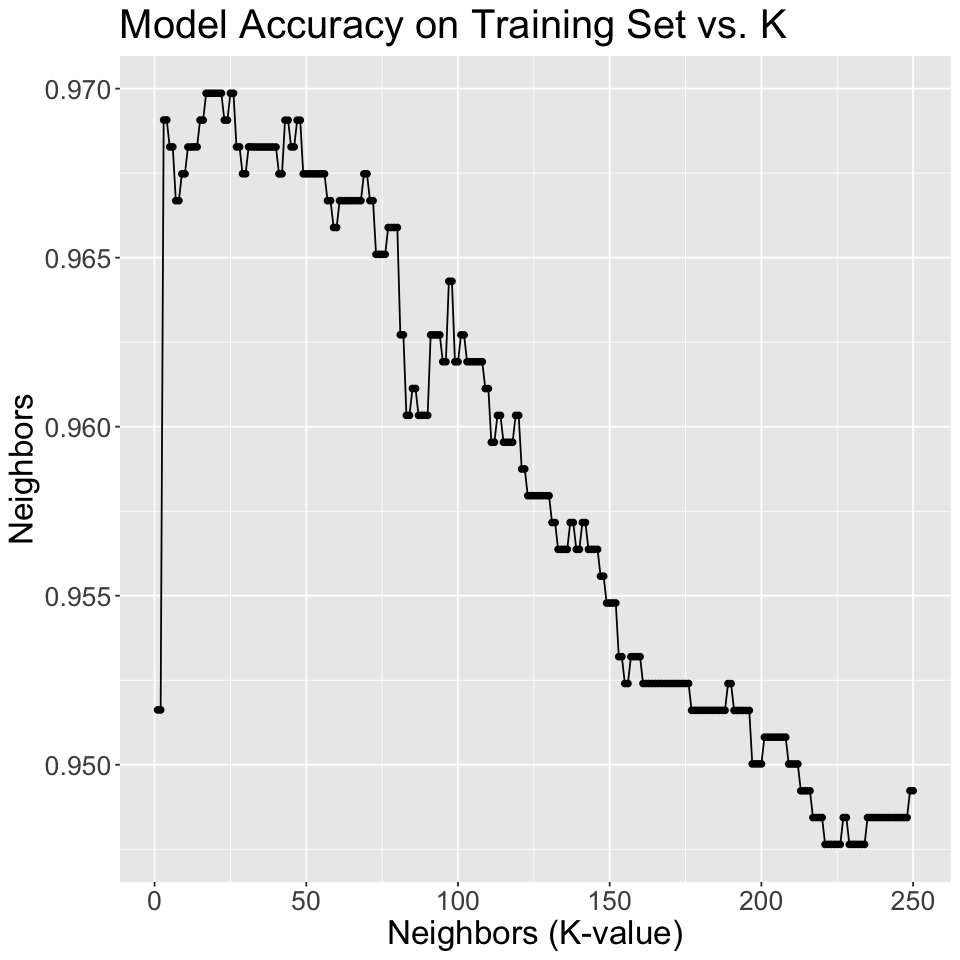

In [224]:
options(repr.plot.height = 8, repr.plot.width = 8)

first_fit |>
    ggplot(aes(x = neighbors, y = mean)) + 
    geom_point() +
    geom_line() +
    labs(x = "Neighbors (K-value)",
         title = "Model Accuracy on Training Set vs. K", 
         y = "Neighbors") +
    theme(text = element_text(size = 20))

We use our [forward selection package](#appendix1) to optimize our parameters:

In [227]:
x <- forward_selection(grouped_train_data |> select(!name), "pos")

      pos BLK_per_MP AST_per_MP TRB_per_MP STL_per_MP three_PA_per_MP
1 Forward 0.02346690 0.05556785  0.3114899 0.02501660    8.855435e-04
2 Forward 0.02152318 0.05629139  0.2251656 0.02814570    1.655629e-03
3 Forward 0.09331758 0.02640904  0.2623186 0.01991225    8.437395e-05
4 Forward 0.03446831 0.07934893  0.2721561 0.02477410    3.889654e-03
5 Forward 0.02172840 0.02518519  0.2641975 0.02074074    9.876543e-04
6 Forward 0.01973684 0.04605263  0.2368421 0.01315789    0.000000e+00
   PF_per_MP weight height
1 0.17622316    270     84
2 0.14900662    230     81
3 0.11778603    250     82
4 0.07396326    245     82
5 0.11160494    235     81
6 0.24342105    250     87


In [231]:
x |>
    arrange(by = desc(accuracy))

size,model_string,accuracy
<int>,<chr>,<dbl>
3,pos ~ TRB_per_MP+height+three_PA_per_MP,0.9738252
6,pos ~ TRB_per_MP+height+three_PA_per_MP+BLK_per_MP+weight+AST_per_MP,0.9722348
2,pos ~ TRB_per_MP+height,0.9714443
4,pos ~ TRB_per_MP+height+three_PA_per_MP+BLK_per_MP,0.9706506
5,pos ~ TRB_per_MP+height+three_PA_per_MP+BLK_per_MP+weight,0.9698601
7,pos ~ TRB_per_MP+height+three_PA_per_MP+BLK_per_MP+weight+AST_per_MP+STL_per_MP,0.9690633
8,pos ~ TRB_per_MP+height+three_PA_per_MP+BLK_per_MP+weight+AST_per_MP+STL_per_MP+PF_per_MP,0.9666824
1,pos ~ TRB_per_MP,0.8968756


We can see above that the model with 3 parameters: `TRB_per_MP`, `height`, and `three_PA_per_MP` performs the best. This is the model we will use with our test data. Also note, the model with 2 parameters (TRB_per_MP, height) has almost as good accuracy; we will use this model to create a visualization at the end.

In [ ]:
# change test_data:
grouped_test_data <- 

In [ ]:
optimized_recipe <- recipe(pos ~ TRB_per_MP + three_PA_per_MP + height,
                  data = grouped_train_data) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())

first_vfold1 <- vfold_cv(grouped_train_data, v = 5, strata = pos)

first_fit <- workflow() |>
    add_recipe(first_recipe) |>
    add_model(knn_spec) |>
    fit(grouped_train_data) |>
    predict(


In [ ]:
ball_recipe1 <- recipe(pos ~ BLK_per_MP + AST_per_MP + TRB_per_MP + three_PA_per_MP + weight + height, 
                       data = player_train) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())


ks <- tibble(neighbors = seq(from = 80, to = 100, by = 1))

ball_vfold1 <- vfold_cv(player_train, v = 5, strata = pos)

ball_spec1 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

ball_fit1 <- workflow() |>
    add_recipe(ball_recipe1) |>
    add_model(ball_spec1) |>
    tune_grid(resamples = ball_vfold1, grid = ks) |>
    collect_metrics()

ball_fit1

# Discussion

# Sources

# Appendices

In [232]:
forward_selection <- function (data, class) {
    
    cv_fold_n <- 5
    
    # COLUMN NAMES
    names <- colnames(data |> select(-all_of(class)))
    
    # RESULTS DATAFRAME
    accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())
    
    # TUNING MODEL
    knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")
    
    
    # X-FOLD CROSS-VALIDATION OBJECT
    data_vfold <- vfold_cv(data, v = 5, strata = all_of(class))

    # NUMBER OF PREDICTORS
    n_total <- length(names)
    
    # SELECTED PREDICTORS
    selected <- c()

    
    for (i in 1:n_total) {
        accs <- list()
        models <- list()
        for (j in 1:length(names)) {
            preds_new <- c(selected, names[[j]])
            model_string <- paste(all_of(class), "~", paste(preds_new, collapse="+"))
            
            temp_recipe <- recipe(as.formula(model_string),
                                  data = data) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())
            
            acc <- workflow() |>
                add_recipe(temp_recipe) |>
                add_model(knn_spec) |>
                tune_grid(resamples = data_vfold, grid = 2) |>
                collect_metrics() |> 
                filter(.metric == "accuracy") |>
                summarize(mx = max(mean))
            acc <- acc$mx |> unlist()
            
            # add this result to the dataframe
            accs[[j]] <- acc
            models[[j]] <- model_string
        }
        
        jstar <- which.max(unlist(accs))
        accuracies <- accuracies |> 
          add_row(size = i, 
                  model_string = models[[jstar]], 
                  accuracy = accs[[jstar]])
        selected <- c(selected, names[[jstar]])
        names <- names[-jstar]
    }
    
    return(accuracies)
}

In [ ]:
forward_selection <- function (data, class) {
    
    cv_fold_n <- 5
    
    # COLUMN NAMES
    names <- colnames(data |> select(-all_of(class)))
    
    # RESULTS DATAFRAME
    accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())
    
    # TUNING MODEL
    knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")
    
    
    # X-FOLD CROSS-VALIDATION OBJECT
    data_vfold <- vfold_cv(data, v = 5, strata = all_of(class))

    # NUMBER OF PREDICTORS
    n_total <- length(names)
    
    # SELECTED PREDICTORS
    selected <- c()

    ks <- tibble(neighbors = 0:10)
    
    for (i in 1:n_total) {
        accs <- list()
        model_strings <- list()
        models <- list()
        for (j in 1:length(names)) {
            preds_new <- c(selected, names[[j]])
            model_string <- paste(all_of(class), "~", paste(preds_new, collapse="+"))
            
            temp_recipe <- recipe(as.formula(model_string),
                                  data = data) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())
            
            mod <- workflow() |>
                add_recipe(temp_recipe) |>
                add_model(knn_spec) |>
                tune_grid(resamples = data_vfold, grid = ks)
            
            acc <- mod |>
                collect_metrics() |> 
                filter(.metric == "accuracy") |>
                summarize(mx = max(mean))
            
            acc <- acc$mx |> unlist()
            
            # add this result to the dataframe
            accs[[j]] <- acc
            model_strings[[j]] <- model_string
            models[[j]] <- mod
        }
        
        jstar <- which.max(unlist(accs))
        accuracies <- accuracies |> 
          add_row(size = i, 
                  model_string = model_strings[[jstar]], 
                  accuracy = accs[[jstar]])
        selected <- c(selected, names[[jstar]])
        names <- names[-jstar]
    }
    
    return(accuracies)
}